In [1]:
# Setup
import matplotlib as plt
import numpy as np
from dolo import *
import dolo.algos.perfect_foresight as pf
import dolo.algos.value_iteration as vi
import pandas as pd

# Define a function to handle plots
def plotQmodel(model, exog, returnDF = False):
    
    # Simpulate the optimal response
    dr = pf.deterministic_solve(model = model,shocks = exog,verbose=True)
    
    # Plot exogenous variables
    fig, axes = plt.pyplot.subplots(1,3)
    axes = axes.flatten()
    ex = ['R','tau','itc_1']
    
    for i in range(len(ex)):
        ax = axes[i]
        ax.plot(dr[ex[i]])
        ax.set_xlabel('Time')
        ax.set_ylabel(ex[i])
        
    # Plot optimal response variables
    fig, axes = plt.pyplot.subplots(2,2)
    axes = axes.flatten()
    opt = ['k','i','lambda_1','q_1']
    
    for i in range(len(opt)):
        ax = axes[i]
        ax.plot(dr[opt[i]])
        ax.set_xlabel('Time')
        ax.set_ylabel(opt[i])
    
    if returnDF:
        return(dr)

In [2]:
# Load and calibrate the model model
model = yaml_import("Q_model.yaml")

alpha = 0.33
delta = 0.05
omega = 2

model.set_calibration(alpha = alpha, delta = delta, omega = omega)

    calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


	> 1 | 0.14048691858940288 | 0
	> 2 | 0.06460775851779599 | 0
	> 3 | 0.024781666464991914 | 0
	> 4 | 0.006098598442334735 | 0
	> 5 | 0.0005015538028684263 | 0
	> 6 | 3.3992652868075623e-06 | 0
	> 7 | 1.1628986662515217e-10 | 0
> System was solved after iteration 7. Residual=1.1628986662515217e-10


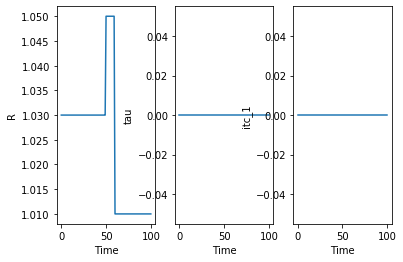

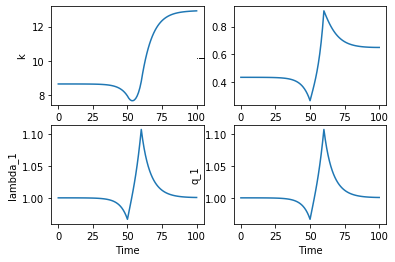

In [3]:
# Interest rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate an interest rate process
exog.R = np.concatenate((np.repeat(1.03,50),
                    np.repeat(1.05,10),
                    np.repeat(1.01,20)))

# Leave tau at 0
exog.tau = 0
# Leave itc at 0
exog.itc_1 = 0

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)

	> 1 | 0.13289022706129228 | 0
	> 2 | 0.05903203062284623 | 0
	> 3 | 0.02093932946849164 | 0
	> 4 | 0.00427858395773173 | 0
	> 5 | 0.00022679630459410127 | 0
	> 6 | 6.034090782591761e-07 | 0
> System was solved after iteration 6. Residual=6.034090782591761e-07


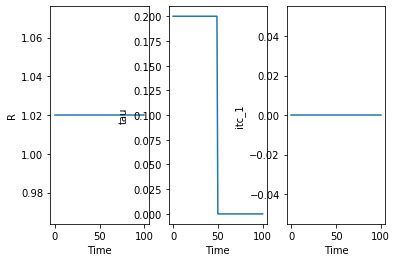

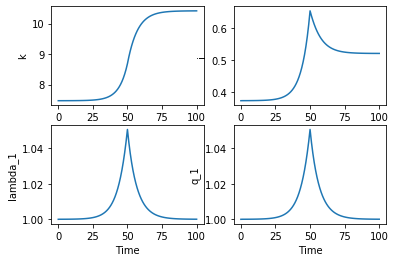

In [4]:
# Tax rate simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate a future tax cut dynamic
exog.tau = np.concatenate((np.repeat(0.2,50),
                           np.repeat(0,50)))

# Leave R at 1.02
exog.R = 1.02
# Leave itc at 0
exog.itc_1 = 0

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)

	> 1 | 0.14653836000902987 | 0
	> 2 | 0.06931619602121619 | 0
	> 3 | 0.02830189243998582 | 0
	> 4 | 0.008056410970118999 | 0
	> 5 | 0.0009314297368322455 | 0
	> 6 | 1.3132741325638797e-05 | 0
	> 7 | 2.203006665979501e-09 | 0
> System was solved after iteration 7. Residual=2.203006665979501e-09


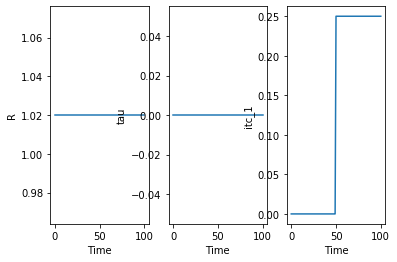

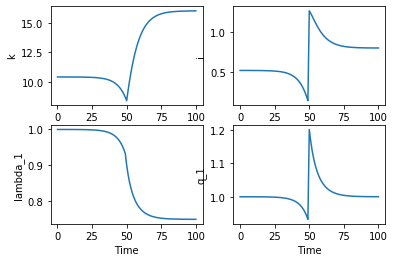

In [5]:
# ITC simulation

# Create empty dataframe for exog. variables
exog = pd.DataFrame(columns = ['R','tau','itc_1'])

# Generate a future itc increase cut dynamic
exog.itc_1 = np.concatenate((np.repeat(0,50),
                           np.repeat(0.25,50)))

# Leave R at 1.02
exog.R = 1.02
# Leave tau at 0
exog.tau = 0

# Solve for the optimal response and plot the results  
plotQmodel(model,exog)